# Supply Data Analysis

## Business Objectives


Important part of our business is a supply/demand balance. We can’t control demand but we can shift some supply to necessary hours to cover more demand during peaks.

As part of the task you will have sample supply and demand data over a few weeks in a single city a few weeks after launch.

#### We need to understand:
- What is the supply to demand dynamic and whether they match?
- Where are the hours of oversupply? Can we shift some of them to undersupply hours?

## Data understanding

#### Hourly driver activity:
- Date – date + hour for which the row of data is presented
- Active drivers – number of active drivers (any level of activity) available during time period
- Online (h) – total supply hours that were available during time period
- Has booking (h) – total hours during which drivers had a client booking (any state)
- Waiting for booking (h) – total hours which drivers spent waiting for booking
- Busy (h) – total hours which drivers were not available to take orders in
- Hours per active driver – aka HPA - average number of hours each driver was online during time period
- Rides per online hour – aka RPH – avg. finished trips per online hour during period
- Finished Rides – number of finished trips during period

#### Hourly Overview Search:
- Date – date + hour for which the row of data is presented
- People saw 0 cars (unique) – number of users who didn’t not see a car.
- People saw +1 cars (unique) – number of users who saw a car.
- Coverage Ratio (unique) – % of users who saw the car.

## Import Required Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import plotly.express as px

## Data Sourcing Cleaning and Preparation

### Supply data info: Hourly Driver Activity

In [2]:
driver_activity = pd.read_csv('Hourly_DriverActivity_1.csv')
driver_activity.head()

,Date,Active drivers,Online (h),Has booking (h),Waiting for booking (h),Busy (h),Hours per active driver,Rides per online hour,Finished Rides
0,2016-12-18 23,52,18,6,11,11,0.3,0.67,12.0
1,2016-12-18 22,59,20,11,9,12,0.3,1.40,28.0
2,2016-12-18 21,72,25,7,18,15,0.3,0.64,16.0
3,2016-12-18 20,86,29,7,23,15,0.3,0.52,15.0
4,2016-12-18 19,82,31,14,17,19,0.4,1.16,36.0


In [3]:
# checking the shape i.e row and column
driver_activity.shape

(840, 9)

In [4]:
overview_search = pd.read_csv('Hourly_OverviewSearch_1.csv')
overview_search.head()

,Date,People saw 0 cars (unique),People saw +1 cars (unique),Coverage Ratio (unique)
0,2016-12-18 23,9,32,78
1,2016-12-18 22,29,64,69
2,2016-12-18 21,5,39,89
3,2016-12-18 20,13,48,79
4,2016-12-18 19,12,77,87


In [5]:
# checking the shape i.e row and column
overview_search.shape

(839, 4)

In [6]:
# Joining Dataframes
drivers_and_users_merge = pd.merge(driver_activity, overview_search, how='left', left_on = 'Date', right_on = 'Date')
drivers_and_users_merge.head()


,Date,Active drivers,Online (h),Has booking (h),Waiting for booking (h),Busy (h),Hours per active driver,Rides per online hour,Finished Rides,People saw 0 cars (unique),People saw +1 cars (unique),Coverage Ratio (unique)
0,2016-12-18 23,52,18,6,11,11,0.3,0.67,12.0,9.0,32.0,78.0
1,2016-12-18 22,59,20,11,9,12,0.3,1.40,28.0,29.0,64.0,69.0
2,2016-12-18 21,72,25,7,18,15,0.3,0.64,16.0,5.0,39.0,89.0
3,2016-12-18 20,86,29,7,23,15,0.3,0.52,15.0,13.0,48.0,79.0
4,2016-12-18 19,82,31,14,17,19,0.4,1.16,36.0,12.0,77.0,87.0


In [7]:
#Rename columns
drivers_and_users = drivers_and_users_merge.rename(columns={"Active drivers":"Demand", 
                                  "Online (h)": "Online", 
                                  "Has booking (h)": "Has_booking", 
                                  "Waiting for booking (h)": "Waiting_for_booking", 
                                  "Busy (h)": "Busy",
                                  "Hours per active driver": "HPA",
                                  "Rides per online hour": "RPH",
                                  "Finished Rides": "Finished_Rides",
                                  "Coverage Ratio (unique)": "Coverage_Ratio",
                                  
                                  "People saw 0 cars (unique)": "Unavailable", 
                                  "People saw +1 cars (unique)": "Available"})
drivers_and_users.head()

,Date,Demand,Online,Has_booking,Waiting_for_booking,Busy,HPA,RPH,Finished_Rides,Unavailable,Available,Coverage_Ratio
0,2016-12-18 23,52,18,6,11,11,0.3,0.67,12.0,9.0,32.0,78.0
1,2016-12-18 22,59,20,11,9,12,0.3,1.40,28.0,29.0,64.0,69.0
2,2016-12-18 21,72,25,7,18,15,0.3,0.64,16.0,5.0,39.0,89.0
3,2016-12-18 20,86,29,7,23,15,0.3,0.52,15.0,13.0,48.0,79.0
4,2016-12-18 19,82,31,14,17,19,0.4,1.16,36.0,12.0,77.0,87.0


In [8]:
drivers_and_users['Date'] = pd.to_datetime(drivers_and_users['Date'])
drivers_and_users['Dates'] = drivers_and_users['Date'].dt.strftime('%Y-%m-%d')
drivers_and_users['Time'] = drivers_and_users['Date'].dt.strftime('%H')
drivers_and_users['Week_Number'] = drivers_and_users['Date'].dt.week
drivers_and_users['Week_Name'] = drivers_and_users['Date'].dt.day_name()

/var/folders/fh/4bl9x57d0775nk64phtzbw3c0000gn/T/ipykernel_23002/382627898.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  drivers_and_users['Week_Number'] = drivers_and_users['Date'].dt.week


In [9]:
#checking for null values column wise
drivers_and_users.isnull().sum()

Date                    0
Demand                  0
Online                  0
Has_booking             0
Waiting_for_booking     0
Busy                    0
HPA                     0
RPH                     0
Finished_Rides         45
Unavailable             1
Available               1
Coverage_Ratio          1
Dates                   0
Time                    0
Week_Number             0
Week_Name               0
dtype: int64

In [10]:
#Checking null value percetage in each column
round(100*(drivers_and_users.isnull().sum()/len(drivers_and_users.index)), 2)

Date                   0.00
Demand                 0.00
Online                 0.00
Has_booking            0.00
Waiting_for_booking    0.00
Busy                   0.00
HPA                    0.00
RPH                    0.00
Finished_Rides         5.36
Unavailable            0.12
Available              0.12
Coverage_Ratio         0.12
Dates                  0.00
Time                   0.00
Week_Number            0.00
Week_Name              0.00
dtype: float64

In [11]:
drivers_and_users.describe().round(1)

,Demand,Online,Has_booking,Waiting_for_booking,Busy,HPA,RPH,Finished_Rides,Unavailable,Available,Coverage_Ratio,Week_Number
count,840.0,840.0,840.0,840.0,840.0,840.0,840.0,795.0,839.0,839.0,839.0,840.0
mean,61.6,23.2,6.3,16.9,15.3,0.4,0.6,14.8,12.2,36.0,75.7,48.0
std,25.9,11.1,5.5,9.1,6.4,0.1,0.4,11.4,16.6,25.2,18.3,1.4
min,9.0,2.0,0.0,2.0,1.0,0.1,0.0,1.0,0.0,0.0,0.0,46.0
25%,41.0,14.0,2.0,10.0,10.0,0.3,0.3,6.0,3.0,19.0,66.0,47.0
50%,63.0,23.0,5.0,16.0,15.0,0.4,0.5,12.0,6.0,32.0,80.0,48.0
75%,80.2,31.0,9.0,23.0,20.0,0.4,0.8,20.0,14.0,49.0,89.0,49.0
max,129.0,56.0,29.0,48.0,37.0,0.6,2.0,62.0,129.0,172.0,100.0,50.0


In [12]:
drivers_and_users.head()

,Date,Demand,Online,Has_booking,Waiting_for_booking,Busy,HPA,RPH,Finished_Rides,Unavailable,Available,Coverage_Ratio,Dates,Time,Week_Number,Week_Name
0,2016-12-18 23:00:00,52,18,6,11,11,0.3,0.67,12.0,9.0,32.0,78.0,2016-12-18,23,50,Sunday
1,2016-12-18 22:00:00,59,20,11,9,12,0.3,1.40,28.0,29.0,64.0,69.0,2016-12-18,22,50,Sunday
2,2016-12-18 21:00:00,72,25,7,18,15,0.3,0.64,16.0,5.0,39.0,89.0,2016-12-18,21,50,Sunday
3,2016-12-18 20:00:00,86,29,7,23,15,0.3,0.52,15.0,13.0,48.0,79.0,2016-12-18,20,50,Sunday
4,2016-12-18 19:00:00,82,31,14,17,19,0.4,1.16,36.0,12.0,77.0,87.0,2016-12-18,19,50,Sunday


In [13]:
# Group by day of week and time
columns = {'Demand':'mean', 'Online':'mean', 
           'Unavailable':'mean', 'Available':'mean', 
           'Has_booking': 'mean', 'Waiting_for_booking':'mean', 'Busy':'mean','Finished_Rides':'mean'}
groupby_time_drivers_and_users = drivers_and_users.groupby(['Week_Name','Time'], as_index = False).agg(columns)
groupby_time_drivers_and_users['Week_Name'] = pd.Categorical(groupby_time_drivers_and_users['Week_Name'], categories=
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'],
    ordered=True)
groupby_time_drivers_and_users['RPH_by_time'] = (groupby_time_drivers_and_users.Finished_Rides/groupby_time_drivers_and_users.Online).round(2)
groupby_time_drivers_and_users['HRA_by_time'] = (groupby_time_drivers_and_users.Online/groupby_time_drivers_and_users.Demand).round(2)
groupby_time_drivers_and_users['Conversion'] = (groupby_time_drivers_and_users.Finished_Rides/groupby_time_drivers_and_users.Available).round(2)
groupby_time_drivers_and_users['Coverage_Ratio_by_time'] = (groupby_time_drivers_and_users.Available/(groupby_time_drivers_and_users.Available+groupby_time_drivers_and_users.Unavailable)).round(2)

groupby_time_drivers_and_users.head()

,Week_Name,Time,Demand,Online,Unavailable,Available,Has_booking,Waiting_for_booking,Busy,Finished_Rides,RPH_by_time,HRA_by_time,Conversion,Coverage_Ratio_by_time
0,Friday,00,60.4,24.6,13.2,53.4,10.0,14.8,15.6,24.8,1.01,0.41,0.46,0.80
1,Friday,01,52.0,19.6,9.8,29.6,5.6,14.0,13.2,13.6,0.69,0.38,0.46,0.75
2,Friday,02,39.4,15.4,14.2,19.4,3.4,12.0,9.6,8.8,0.57,0.39,0.45,0.58
3,Friday,03,28.6,11.4,17.0,16.6,2.8,8.4,9.0,7.4,0.65,0.40,0.45,0.49
4,Friday,04,24.6,7.8,10.8,9.2,1.8,6.2,8.6,3.8,0.49,0.32,0.41,0.46


## Data Analysis

### 1. Show which 36 hours in a week are most undersupplied. Show/describe your decision based on sample data.

In [14]:
groupby_time_drivers_and_users['Supply'] = (groupby_time_drivers_and_users.Unavailable + 
                                            groupby_time_drivers_and_users.Available)
groupby_time_drivers_and_users['SD_difference'] = (groupby_time_drivers_and_users.Supply - 
                                                   groupby_time_drivers_and_users.Demand)
groupby_time_drivers_and_users.head()

,Week_Name,Time,Demand,Online,Unavailable,Available,Has_booking,Waiting_for_booking,Busy,Finished_Rides,RPH_by_time,HRA_by_time,Conversion,Coverage_Ratio_by_time,Supply,SD_difference
0,Friday,00,60.4,24.6,13.2,53.4,10.0,14.8,15.6,24.8,1.01,0.41,0.46,0.80,66.6,6.2
1,Friday,01,52.0,19.6,9.8,29.6,5.6,14.0,13.2,13.6,0.69,0.38,0.46,0.75,39.4,-12.6
2,Friday,02,39.4,15.4,14.2,19.4,3.4,12.0,9.6,8.8,0.57,0.39,0.45,0.58,33.6,-5.8
3,Friday,03,28.6,11.4,17.0,16.6,2.8,8.4,9.0,7.4,0.65,0.40,0.45,0.49,33.6,5.0
4,Friday,04,24.6,7.8,10.8,9.2,1.8,6.2,8.6,3.8,0.49,0.32,0.41,0.46,20.0,-4.6


In [15]:
# 36 hours in a week are most undersupplied by Unavailable
hours_36 = groupby_time_drivers_and_users.sort_values(by=['Unavailable'], ascending=False)
hours_36.head(37)

,Week_Name,Time,Demand,Online,Unavailable,Available,Has_booking,Waiting_for_booking,Busy,Finished_Rides,RPH_by_time,HRA_by_time,Conversion,Coverage_Ratio_by_time,Supply,SD_difference
114,Thursday,18,84.8,34.0,52.2,76.2,18.8,15.4,24.2,33.0,0.97,0.40,0.43,0.59,128.4,43.6
9,Friday,09,61.0,25.2,45.6,56.6,13.0,12.2,13.8,27.0,1.07,0.41,0.48,0.55,102.2,41.2
52,Saturday,04,41.8,16.4,38.4,30.8,6.8,9.4,11.8,17.2,1.05,0.39,0.56,0.45,69.2,27.4
162,Wednesday,18,87.0,31.2,38.2,72.2,16.0,15.2,23.8,29.0,0.93,0.36,0.40,0.65,110.4,23.4
115,Thursday,19,91.0,37.2,37.4,80.0,18.2,19.0,23.6,33.4,0.90,0.41,0.42,0.68,117.4,26.4
128,Tuesday,08,54.8,22.0,37.4,41.8,11.0,11.2,12.6,21.6,0.98,0.40,0.52,0.53,79.2,24.4
129,Tuesday,09,69.2,27.8,36.6,56.2,15.0,12.8,15.2,27.4,0.99,0.40,0.49,0.61,92.8,23.6
138,Tuesday,18,91.2,31.4,34.8,69.4,16.4,15.2,22.2,29.2,0.93,0.34,0.42,0.67,104.2,13.0
51,Saturday,03,52.8,21.8,34.6,45.4,8.4,13.2,14.8,21.0,0.96,0.41,0.46,0.57,80.0,27.2
19,Friday,19,103.4,42.6,34.6,84.8,15.8,26.6,22.4,28.0,0.66,0.41,0.33,0.71,119.4,16.0


### 2. 24-hour curve of average supply and demand (to illustrate match/mismatch).

In [16]:
columns = {'Demand':'mean', 'Supply':'mean'}
groupby_day_drivers_and_users = (groupby_time_drivers_and_users.
                                 groupby(['Time'], as_index = False).
                                 agg(columns).round(1))
groupby_day_drivers_and_users

,Time,Demand,Supply
0,00,61.2,54.1
1,01,51.5,37.8
2,02,39.7,30.3
3,03,31.9,30.6
4,04,27.4,25.8
5,05,26.7,11.6
6,06,28.3,10.2
7,07,36.7,28.3
8,08,47.3,57.4
9,09,57.1,71.5


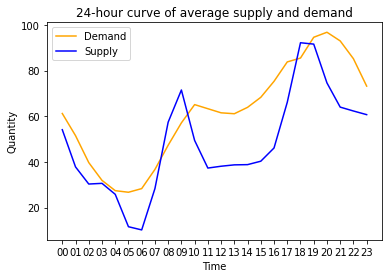

In [17]:
# Illustration match/mismatch supply and demand
plt.plot(groupby_day_drivers_and_users['Time'], 
         groupby_day_drivers_and_users['Demand'], 
         color = 'orange', label = 'Demand');
plt.plot(groupby_day_drivers_and_users['Time'], 
         groupby_day_drivers_and_users['Supply'], 
         color = 'blue', label = 'Supply');
plt.xlabel('Time');
plt.ylabel('Quantity');
plt.title('24-hour curve of average supply and demand')
plt.legend();

Болшой недостаток водителей с 5-6 утра, днем с 10 - 17 и после 20 часов. 

### 3. Visualisation of hours where we lack supply during a weekly period. This one we can send to drivers to show when to online for extra hours.

In [18]:
groupby_time_drivers_and_users['Week_name_time'] = (groupby_time_drivers_and_users.Week_Name.astype(str) + " " + 
                                                    groupby_time_drivers_and_users.Time)
groupby_time_drivers_and_users

,Week_Name,Time,Demand,Online,Unavailable,Available,Has_booking,Waiting_for_booking,Busy,Finished_Rides,RPH_by_time,HRA_by_time,Conversion,Coverage_Ratio_by_time,Supply,SD_difference,Week_name_time
0,Friday,00,60.4,24.6,13.2,53.4,10.0,14.8,15.6,24.8,1.01,0.41,0.46,0.80,66.6,6.2,Friday 00
1,Friday,01,52.0,19.6,9.8,29.6,5.6,14.0,13.2,13.6,0.69,0.38,0.46,0.75,39.4,-12.6,Friday 01
2,Friday,02,39.4,15.4,14.2,19.4,3.4,12.0,9.6,8.8,0.57,0.39,0.45,0.58,33.6,-5.8,Friday 02
3,Friday,03,28.6,11.4,17.0,16.6,2.8,8.4,9.0,7.4,0.65,0.40,0.45,0.49,33.6,5.0,Friday 03
4,Friday,04,24.6,7.8,10.8,9.2,1.8,6.2,8.6,3.8,0.49,0.32,0.41,0.46,20.0,-4.6,Friday 04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,Wednesday,19,95.0,36.6,29.0,71.8,16.8,20.2,24.2,32.0,0.87,0.39,0.45,0.71,100.8,5.8,Wednesday 19
164,Wednesday,20,99.0,41.8,8.8,59.8,10.6,31.2,22.8,22.0,0.53,0.42,0.37,0.87,68.6,-30.4,Wednesday 20
165,Wednesday,21,95.4,35.8,5.6,51.6,7.4,28.4,23.8,22.4,0.63,0.38,0.43,0.90,57.2,-38.2,Wednesday 21
166,Wednesday,22,85.0,32.2,9.8,57.0,8.4,23.4,21.0,26.2,0.81,0.38,0.46,0.85,66.8,-18.2,Wednesday 22


In [19]:
columns = {'SD_difference':'mean'}
groupby_day_drivers_and_users = (groupby_time_drivers_and_users.
                                 groupby(['Week_name_time'], as_index = False).
                                 agg(columns).round(1))

lack_supply = groupby_day_drivers_and_users[groupby_day_drivers_and_users["SD_difference"] < 0]
lack_supply.head()

,Week_name_time,SD_difference
1,Friday 01,-12.6
2,Friday 02,-5.8
4,Friday 04,-4.6
5,Friday 05,-14.8
6,Friday 06,-18.6


Text(0.5, 1.0, 'Lack supply during')

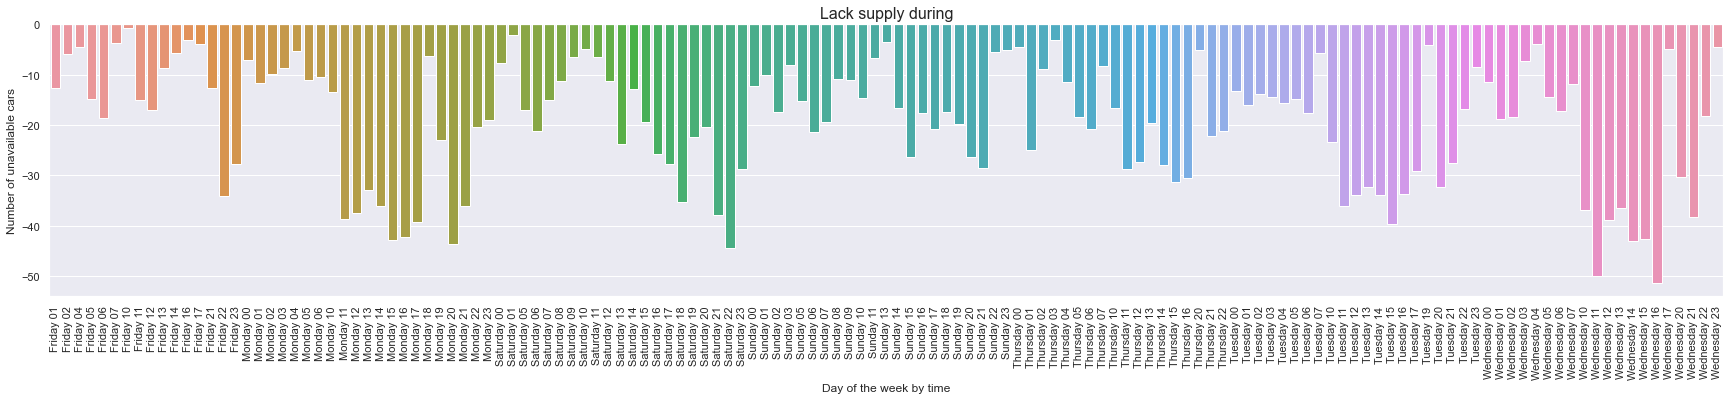

In [20]:
sns.set(rc={'figure.figsize':(30,5)})
ax = sns.barplot(x="Week_name_time", y="SD_difference", data=lack_supply)
ax.tick_params(axis='x', rotation=90)
ax.set_xlabel("Day of the week by time", fontsize = 12)
ax.set_ylabel("Number of unavailable cars", fontsize = 12)
ax.set_title('Lack supply during', fontsize = 16)


### 4. Estimate number of hours needed to ensure we have a high Coverage Ratio during most peak hours.

In [21]:
groupby_time_drivers_and_users.head()

,Week_Name,Time,Demand,Online,Unavailable,Available,Has_booking,Waiting_for_booking,Busy,Finished_Rides,RPH_by_time,HRA_by_time,Conversion,Coverage_Ratio_by_time,Supply,SD_difference,Week_name_time
0,Friday,00,60.4,24.6,13.2,53.4,10.0,14.8,15.6,24.8,1.01,0.41,0.46,0.80,66.6,6.2,Friday 00
1,Friday,01,52.0,19.6,9.8,29.6,5.6,14.0,13.2,13.6,0.69,0.38,0.46,0.75,39.4,-12.6,Friday 01
2,Friday,02,39.4,15.4,14.2,19.4,3.4,12.0,9.6,8.8,0.57,0.39,0.45,0.58,33.6,-5.8,Friday 02
3,Friday,03,28.6,11.4,17.0,16.6,2.8,8.4,9.0,7.4,0.65,0.40,0.45,0.49,33.6,5.0,Friday 03
4,Friday,04,24.6,7.8,10.8,9.2,1.8,6.2,8.6,3.8,0.49,0.32,0.41,0.46,20.0,-4.6,Friday 04


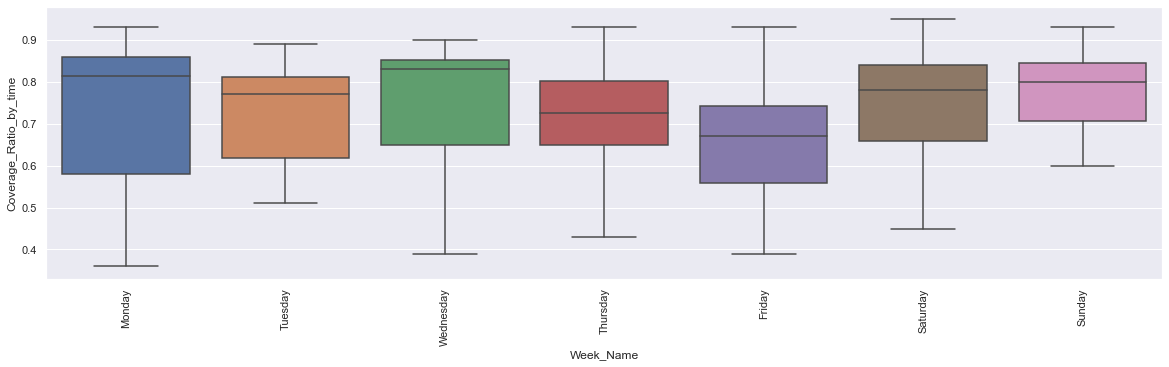

In [22]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.boxplot(x="Week_Name", y="Coverage_Ratio_by_time", data=groupby_time_drivers_and_users)
ax.tick_params(axis='x', rotation=90)


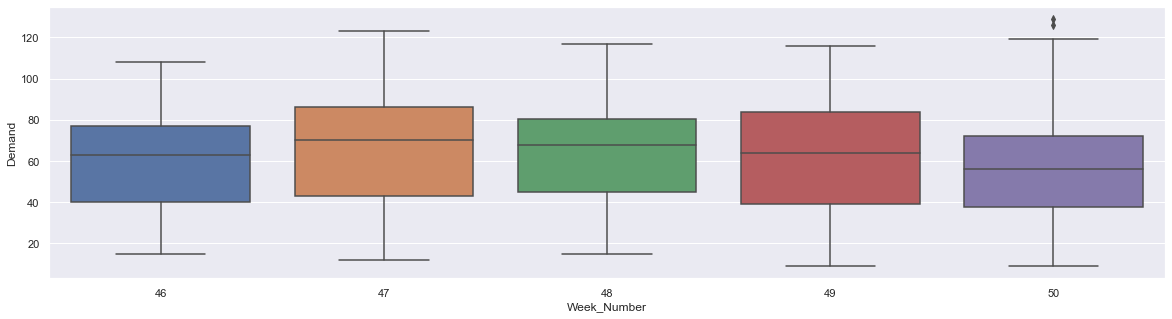

In [23]:
ax = sns.boxplot(x="Week_Number", y="Demand", data=drivers_and_users)

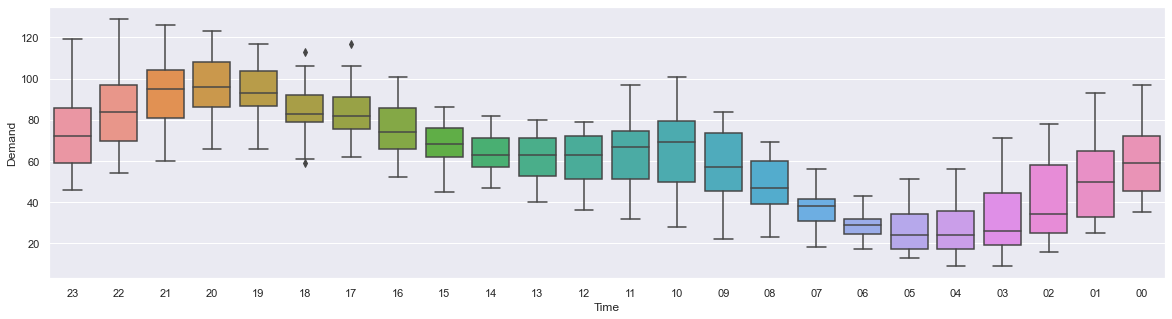

In [24]:
ax = sns.boxplot(x="Time", y="Demand", data=drivers_and_users)

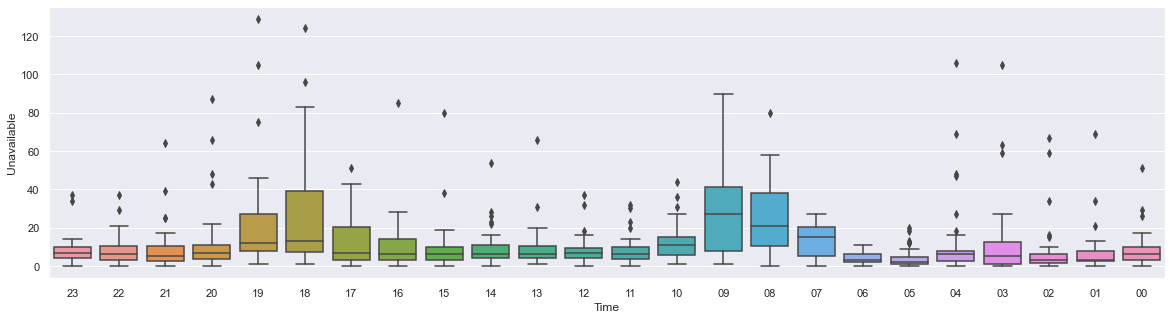

In [25]:
ax = sns.boxplot(x="Time", y="Unavailable", data=drivers_and_users)

<AxesSubplot:>

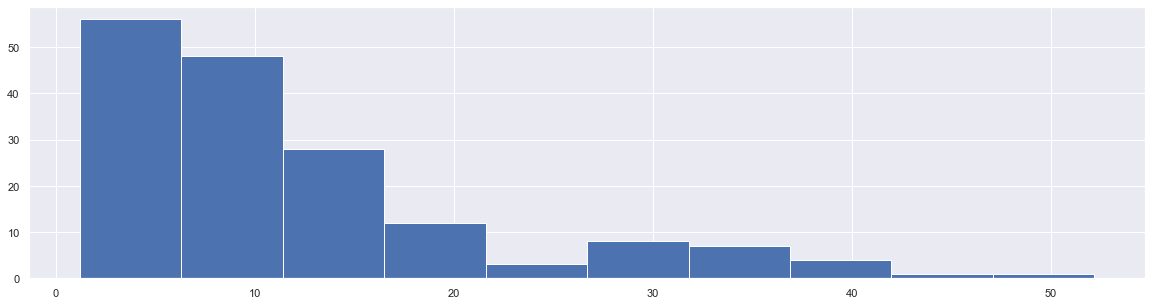

In [26]:
groupby_time_drivers_and_users['Unavailable'].hist()

<AxesSubplot:>

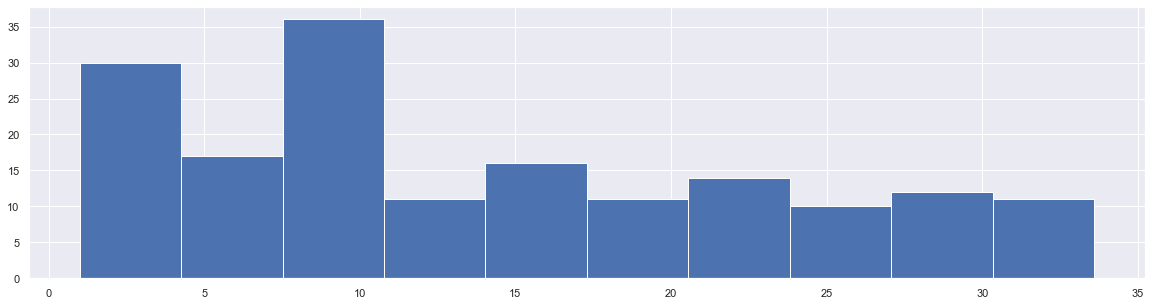

In [33]:
groupby_time_drivers_and_users['Finished_Rides'].hist()

<AxesSubplot:>

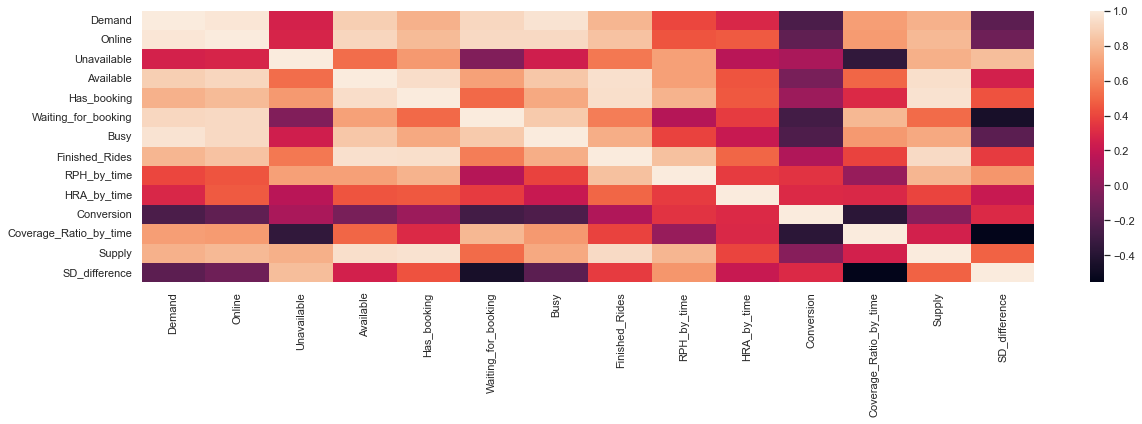

In [28]:
sns.heatmap(groupby_time_drivers_and_users.corr())

### 5. Calculate levels of guaranteed hourly earnings we can offer to drivers during 36 weekly hours with highest demand without losing money + how much extra hours we want to get to capture missed demand.
- Assume that Finished Rides have an average value of €10 (80% goes to driver, 20% is our revenue).
- Assume the same level of demand with increased supply, base it on RPH over 3 hour periods, but with increased supply.
- Assume that with extra hours we will capture “missed coverage” or people attributed to “People saw 0 cars” in demand data.


In [29]:
hours_36.head(37)

,Week_Name,Time,Demand,Online,Unavailable,Available,Has_booking,Waiting_for_booking,Busy,Finished_Rides,RPH_by_time,HRA_by_time,Conversion,Coverage_Ratio_by_time,Supply,SD_difference
114,Thursday,18,84.8,34.0,52.2,76.2,18.8,15.4,24.2,33.0,0.97,0.40,0.43,0.59,128.4,43.6
9,Friday,09,61.0,25.2,45.6,56.6,13.0,12.2,13.8,27.0,1.07,0.41,0.48,0.55,102.2,41.2
52,Saturday,04,41.8,16.4,38.4,30.8,6.8,9.4,11.8,17.2,1.05,0.39,0.56,0.45,69.2,27.4
162,Wednesday,18,87.0,31.2,38.2,72.2,16.0,15.2,23.8,29.0,0.93,0.36,0.40,0.65,110.4,23.4
115,Thursday,19,91.0,37.2,37.4,80.0,18.2,19.0,23.6,33.4,0.90,0.41,0.42,0.68,117.4,26.4
128,Tuesday,08,54.8,22.0,37.4,41.8,11.0,11.2,12.6,21.6,0.98,0.40,0.52,0.53,79.2,24.4
129,Tuesday,09,69.2,27.8,36.6,56.2,15.0,12.8,15.2,27.4,0.99,0.40,0.49,0.61,92.8,23.6
138,Tuesday,18,91.2,31.4,34.8,69.4,16.4,15.2,22.2,29.2,0.93,0.34,0.42,0.67,104.2,13.0
51,Saturday,03,52.8,21.8,34.6,45.4,8.4,13.2,14.8,21.0,0.96,0.41,0.46,0.57,80.0,27.2
19,Friday,19,103.4,42.6,34.6,84.8,15.8,26.6,22.4,28.0,0.66,0.41,0.33,0.71,119.4,16.0


In [30]:
hours_36.describe().round(2)

,Demand,Online,Unavailable,Available,Has_booking,Waiting_for_booking,Busy,Finished_Rides,RPH_by_time,HRA_by_time,Conversion,Coverage_Ratio_by_time,Supply,SD_difference
count,168.00,168.00,168.00,168.00,168.00,168.00,168.00,168.00,168.00,168.00,168.00,168.00,168.00,168.00
mean,61.60,23.20,12.23,36.01,6.31,16.90,15.27,14.12,0.56,0.37,0.40,0.73,48.24,-13.37
std,24.60,10.12,10.00,21.14,4.60,7.01,5.67,9.39,0.24,0.04,0.13,0.14,27.70,18.02
min,12.40,4.60,1.20,1.80,0.00,4.20,4.80,1.00,0.12,0.28,0.15,0.36,3.20,-51.40
25%,40.65,14.60,5.60,20.90,3.00,10.75,10.00,7.00,0.37,0.35,0.31,0.64,29.75,-25.95
50%,64.80,23.40,8.90,34.10,5.30,16.90,15.80,10.90,0.53,0.38,0.38,0.75,43.90,-14.52
75%,79.95,30.35,14.45,52.70,9.20,21.25,19.90,21.70,0.73,0.40,0.45,0.84,68.15,-4.80
max,110.80,46.40,52.20,85.80,20.20,36.00,25.80,33.60,1.07,0.44,1.15,0.95,128.40,43.60


In [31]:
value = 10
driver_share = 0.8
RPH_by_time_75 = hours_36["RPH_by_time"].quantile(0.75)
hours_36['Potential'] = (hours_36.Unavailable * hours_36.Conversion).round(2)
hours_36['Earn'] = hours_36.RPH_by_time * value * driver_share
hours_36['Additional_hours'] = (hours_36.Potential/RPH_by_time_75).round(2)

hours_36.head(37)

,Week_Name,Time,Demand,Online,Unavailable,Available,Has_booking,Waiting_for_booking,Busy,Finished_Rides,RPH_by_time,HRA_by_time,Conversion,Coverage_Ratio_by_time,Supply,SD_difference,Potential,Earn,Additional_hours
114,Thursday,18,84.8,34.0,52.2,76.2,18.8,15.4,24.2,33.0,0.97,0.40,0.43,0.59,128.4,43.6,22.45,7.76,30.65
9,Friday,09,61.0,25.2,45.6,56.6,13.0,12.2,13.8,27.0,1.07,0.41,0.48,0.55,102.2,41.2,21.89,8.56,29.88
52,Saturday,04,41.8,16.4,38.4,30.8,6.8,9.4,11.8,17.2,1.05,0.39,0.56,0.45,69.2,27.4,21.50,8.40,29.35
162,Wednesday,18,87.0,31.2,38.2,72.2,16.0,15.2,23.8,29.0,0.93,0.36,0.40,0.65,110.4,23.4,15.28,7.44,20.86
115,Thursday,19,91.0,37.2,37.4,80.0,18.2,19.0,23.6,33.4,0.90,0.41,0.42,0.68,117.4,26.4,15.71,7.20,21.45
128,Tuesday,08,54.8,22.0,37.4,41.8,11.0,11.2,12.6,21.6,0.98,0.40,0.52,0.53,79.2,24.4,19.45,7.84,26.55
129,Tuesday,09,69.2,27.8,36.6,56.2,15.0,12.8,15.2,27.4,0.99,0.40,0.49,0.61,92.8,23.6,17.93,7.92,24.48
138,Tuesday,18,91.2,31.4,34.8,69.4,16.4,15.2,22.2,29.2,0.93,0.34,0.42,0.67,104.2,13.0,14.62,7.44,19.96
51,Saturday,03,52.8,21.8,34.6,45.4,8.4,13.2,14.8,21.0,0.96,0.41,0.46,0.57,80.0,27.2,15.92,7.68,21.73
19,Friday,19,103.4,42.6,34.6,84.8,15.8,26.6,22.4,28.0,0.66,0.41,0.33,0.71,119.4,16.0,11.42,5.28,15.59


In [34]:
hours_36.describe()

,Demand,Online,Unavailable,Available,Has_booking,Waiting_for_booking,Busy,Finished_Rides,RPH_by_time,HRA_by_time,Conversion,Coverage_Ratio_by_time,Supply,SD_difference,Potential,Earn,Additional_hours
count,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000
mean,61.603571,23.197619,12.230655,36.007143,6.308333,16.903571,15.269048,14.120536,0.561905,0.372500,0.397857,0.726548,48.237798,-13.365774,4.988452,4.495238,6.810238
std,24.595998,10.122933,10.002456,21.142005,4.595173,7.005626,5.668655,9.385058,0.242872,0.035692,0.128990,0.136816,27.702118,18.021163,4.711344,1.942975,6.431733
min,12.400000,4.600000,1.200000,1.800000,0.000000,4.200000,4.800000,1.000000,0.120000,0.280000,0.150000,0.360000,3.200000,-51.400000,0.700000,0.960000,0.960000
25%,40.650000,14.600000,5.600000,20.900000,3.000000,10.750000,10.000000,7.000000,0.370000,0.347500,0.310000,0.637500,29.750000,-25.950000,1.822500,2.960000,2.490000
50%,64.800000,23.400000,8.900000,34.100000,5.300000,16.900000,15.800000,10.900000,0.530000,0.380000,0.385000,0.750000,43.900000,-14.525000,3.260000,4.240000,4.450000
75%,79.950000,30.350000,14.450000,52.700000,9.200000,21.250000,19.900000,21.700000,0.732500,0.400000,0.450000,0.840000,68.150000,-4.800000,6.010000,5.860000,8.207500
max,110.800000,46.400000,52.200000,85.800000,20.200000,36.000000,25.800000,33.600000,1.070000,0.440000,1.150000,0.950000,128.400000,43.600000,22.450000,8.560000,30.650000


### Conclusion

Ответы на вопросы:
1. What is the supply to demand dynamic and whether they match?
2. Where are the hours of oversupply? Can we shift some of them to undersupply hours?